In [1]:
from __future__ import division
import itertools
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import style
import seaborn as sns

import numpy as np
import pandas as pd
import math
from sklearn import metrics
from random import randint

import datetime
from wrangle import get_connection, get_log_data, new_log_data


%matplotlib inline

In [2]:
df = get_log_data(cached=True)

In [3]:
df.head()

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,NaN,2.0


In [4]:
df.drop(columns='slack', inplace=True, axis=0)

In [5]:
df.drop(columns='deleted_at', inplace=True, axis=0)

In [6]:
df.head()

,date,time,path,user_id,cohort_id,ip,id,name,start_date,end_date,created_at,updated_at,program_id
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22.0,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0


In [7]:
df.head()

,date,time,path,user_id,cohort_id,ip,id,name,start_date,end_date,created_at,updated_at,program_id
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22.0,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0


In [8]:
df['date_time'] = df['date'].str.cat(df['time'],sep=" ")

In [9]:
df.head(1)

,date,time,path,user_id,cohort_id,ip,id,name,start_date,end_date,created_at,updated_at,program_id,date_time
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,2018-01-26 09:55:03


In [10]:


df.date_time = pd.to_datetime(df.date_time)

df = df.set_index('date_time').sort_index()

In [11]:
df.head()

,date,time,path,user_id,cohort_id,ip,id,name,start_date,end_date,created_at,updated_at,program_id
date_time,,,,,,,,,,,,,
2018-01-26 09:55:03,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
2018-01-26 09:56:02,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
2018-01-26 09:56:05,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
2018-01-26 09:56:06,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
2018-01-26 09:56:24,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22.0,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0


In [12]:
df_easley = df.loc[df['name'] == 'Easley']



In [13]:
df_easley['day'] = df_easley.index.day_name()

In [14]:
df_easley['month'] = df_easley.index.month_name()

In [15]:
df['month'] = df.index.month_name()

In [16]:
df['day'] = df.index.day_name()

In [17]:
df_easley.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14715 entries, 2020-12-08 10:49:37 to 2021-04-21 16:32:50
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        14715 non-null  object 
 1   time        14715 non-null  object 
 2   path        14715 non-null  object 
 3   user_id     14715 non-null  int64  
 4   cohort_id   14715 non-null  float64
 5   ip          14715 non-null  object 
 6   id          14715 non-null  float64
 7   name        14715 non-null  object 
 8   start_date  14715 non-null  object 
 9   end_date    14715 non-null  object 
 10  created_at  14715 non-null  object 
 11  updated_at  14715 non-null  object 
 12  program_id  14715 non-null  float64
 13  day         14715 non-null  object 
 14  month       14715 non-null  object 
dtypes: float64(3), int64(1), object(11)
memory usage: 1.8+ MB


In [18]:
df_easley.head()

,date,time,path,user_id,cohort_id,ip,id,name,start_date,end_date,created_at,updated_at,program_id,day,month
date_time,,,,,,,,,,,,,,,
2020-12-08 10:49:37,2020-12-08,10:49:37,/,835,133.0,173.173.109.5,133.0,Easley,2020-12-07,2021-06-08,2020-12-07 15:20:18,2020-12-07 15:20:18,3.0,Tuesday,December
2020-12-08 10:49:39,2020-12-08,10:49:39,/,836,133.0,99.43.137.186,133.0,Easley,2020-12-07,2021-06-08,2020-12-07 15:20:18,2020-12-07 15:20:18,3.0,Tuesday,December
2020-12-08 10:49:40,2020-12-08,10:49:40,/,837,133.0,66.69.79.82,133.0,Easley,2020-12-07,2021-06-08,2020-12-07 15:20:18,2020-12-07 15:20:18,3.0,Tuesday,December
2020-12-08 10:49:52,2020-12-08,10:49:52,/,838,133.0,99.158.249.67,133.0,Easley,2020-12-07,2021-06-08,2020-12-07 15:20:18,2020-12-07 15:20:18,3.0,Tuesday,December
2020-12-08 10:50:16,2020-12-08,10:50:16,/,839,133.0,130.45.49.89,133.0,Easley,2020-12-07,2021-06-08,2020-12-07 15:20:18,2020-12-07 15:20:18,3.0,Tuesday,December


In [19]:
df_easley[df_easley['user_id'] == 835].month.value_counts()

March       268
December    240
February    193
January     152
April       121
Name: month, dtype: int64

In [21]:
df.groupby(df['name']).month.value_counts()

name       month    
Andromeda  April        6712
           June         5654
           May          5164
           March        2685
           July         2682
                        ... 
Zion       July          594
           September     566
           August        383
           October       296
           December      214
Name: month, Length: 440, dtype: int64

user_id


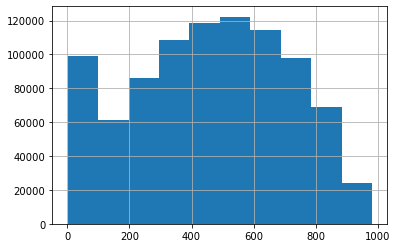

cohort_id


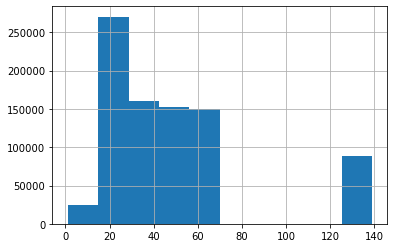

id


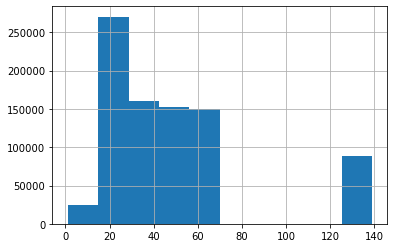

program_id


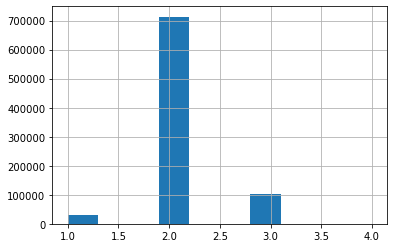

In [22]:
for col in df.columns:
    if np.issubdtype(df[col].dtype, np.number):
        df[col].hist()
        print(col)
        plt.show()

<AxesSubplot:>

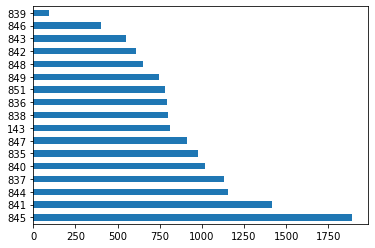

In [24]:
df[df['name'] == "Easley"].user_id.value_counts().plot(kind='barh')

<AxesSubplot:>

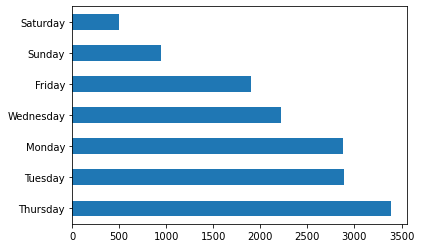

In [26]:
df[df['name'] == "Easley"].day.value_counts().plot(kind='barh')

<AxesSubplot:>

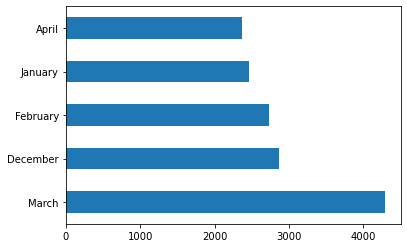

In [27]:
df[df['name'] == "Easley"].month.value_counts().plot(kind='barh')

<AxesSubplot:>

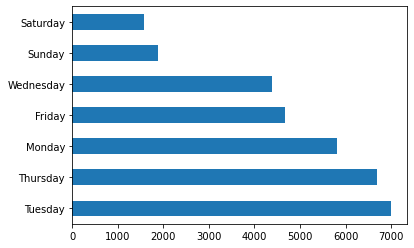

In [31]:
df[df['name'] == "Darden"].day.value_counts().plot(kind='barh')

<AxesSubplot:>

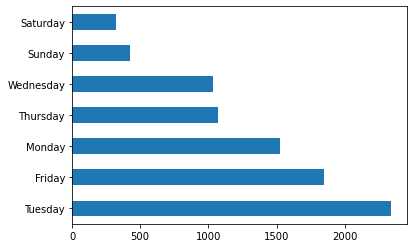

In [32]:
df[df['name'] == "Florence"].day.value_counts().plot(kind='barh')